In [2]:
import sys
import os
sys.path.append('../')
import ghiaseddin

import numpy as np
import lasagne

%matplotlib inline

import matplotlib
import matplotlib.pylab as plt
from datetime import datetime as dt

Using gpu device 0: GeForce GTX TITAN Black (CNMeM is disabled, CuDNN 4007)


In [3]:
zappos1 = ghiaseddin.Zappos50K1(ghiaseddin.settings.zappos_root, attribute_index=0, split_index=0)
googlenet = ghiaseddin.GoogLeNet(ghiaseddin.settings.googlenet_weights)

In [4]:
model = ghiaseddin.Ghiaseddin(extractor=googlenet,
                              dataset=zappos1,
                              weight_decay=1e-5,
                              optimizer=lasagne.updates.rmsprop,
                              ranker_learning_rate=1e-4,
                              extractor_learning_rate=0,
                              ranker_nonlinearity=lasagne.nonlinearities.linear,
                              train_batch_size=16)

In [5]:
model.NAME = "baseline|%s" % model.NAME

In [6]:
model.load()

In [6]:
model.generate_misclassified()

In [7]:
model.eval_accuracy()

0.9233333333333333

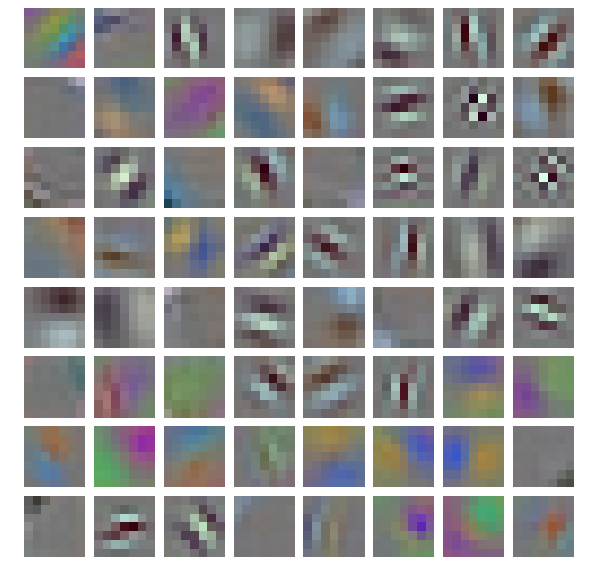

In [7]:
model.conv1_filters()